# Exercises
Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1) Load your zillow dataset.

2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

3) Plot the residuals for the linear regression model that you made.

4) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

6) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7) What is the amount of variance explained in your model?

8) Is your model better than the baseline model?

9) Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


In [38]:
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
from scipy.stats import pearsonr, spearmanr
import scipy
import os
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import wrangle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import statsmodels.api as sm

In [2]:
train = wrangle.train
train

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1349905,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,"Los Angeles,CA"
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,"Ventura,CA"
1244806,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,"Los Angeles,CA"
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,"Orange,CA"
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
728188,12823382,3.0,2.0,1545.0,327671.0,1951,4082.33,"Los Angeles,CA"
1285982,12199184,2.0,1.0,1656.0,32357.0,1909,940.08,"Los Angeles,CA"
1929500,11345782,4.0,3.0,2544.0,514071.0,1999,6987.84,"Los Angeles,CA"
1770542,12300227,4.0,3.0,2512.0,399925.0,1947,5213.92,"Los Angeles,CA"


In [3]:
train.columns = ['parcelid', 'bedct', 'bathct', 'sqft',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'county']
train.taxvaluedollarcnt.astype('int')
train.sqft.astype('int')

1349905    2449
258766     1599
1244806    1969
667578     2085
882530     4922
           ... 
728188     1545
1285982    1656
1929500    2544
1770542    2512
878961     3164
Name: sqft, Length: 1174236, dtype: int64

In [4]:
train

,parcelid,bedct,bathct,sqft,taxvaluedollarcnt,yearbuilt,taxamount,county
1349905,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,"Los Angeles,CA"
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,"Ventura,CA"
1244806,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,"Los Angeles,CA"
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,"Orange,CA"
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
728188,12823382,3.0,2.0,1545.0,327671.0,1951,4082.33,"Los Angeles,CA"
1285982,12199184,2.0,1.0,1656.0,32357.0,1909,940.08,"Los Angeles,CA"
1929500,11345782,4.0,3.0,2544.0,514071.0,1999,6987.84,"Los Angeles,CA"
1770542,12300227,4.0,3.0,2512.0,399925.0,1947,5213.92,"Los Angeles,CA"


## Using scaled data.
### 2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

Here is code to get you started:


In [5]:
# pd.DataFrame makes it into 2d vs 1d so the information can be processed
from sklearn.linear_model import LinearRegression
y = pd.DataFrame(train.taxvaluedollarcnt)
X = pd.DataFrame(train.sqft)
# assuming X and y are already defined
model = LinearRegression().fit(X, y)
train['yhat'] = model.predict(X)
train

,parcelid,bedct,bathct,sqft,taxvaluedollarcnt,yearbuilt,taxamount,county,yhat
1349905,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,"Los Angeles,CA",5.803575e+05
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,"Ventura,CA",3.571102e+05
1244806,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,"Los Angeles,CA",4.542884e+05
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,"Orange,CA",4.847551e+05
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,"Los Angeles,CA",1.229876e+06
...,...,...,...,...,...,...,...,...,...
728188,12823382,3.0,2.0,1545.0,327671.0,1951,4082.33,"Los Angeles,CA",3.429274e+05
1285982,12199184,2.0,1.0,1656.0,32357.0,1909,940.08,"Los Angeles,CA",3.720809e+05
1929500,11345782,4.0,3.0,2544.0,514071.0,1999,6987.84,"Los Angeles,CA",6.053087e+05
1770542,12300227,4.0,3.0,2512.0,399925.0,1947,5213.92,"Los Angeles,CA",5.969041e+05


In [6]:
df = pd.DataFrame(train[['sqft','taxvaluedollarcnt','yhat']])
df.head()

,sqft,taxvaluedollarcnt,yhat
1349905,2449.0,432773.0,5.803575e+05
258766,1599.0,211452.0,3.571102e+05
1244806,1969.0,380466.0,4.542884e+05
667578,2085.0,202010.0,4.847551e+05
882530,4922.0,1107030.0,1.229876e+06


### 3) Plot the residuals for the linear regression model that you made.


In [7]:
#creating a baseline from the mean of the target variable
baseline = y.mean()
df['baseline'] = y.taxvaluedollarcnt.mean()
# turning baseline to int from float
df.baseline = df.baseline.astype(int)
# residual = actual - predicted
df['residual'] = df.taxvaluedollarcnt - df.yhat
df['baseline_residual'] = df.taxvaluedollarcnt - df.baseline

taxvaluedollarcnt    409556.604079
dtype: float64

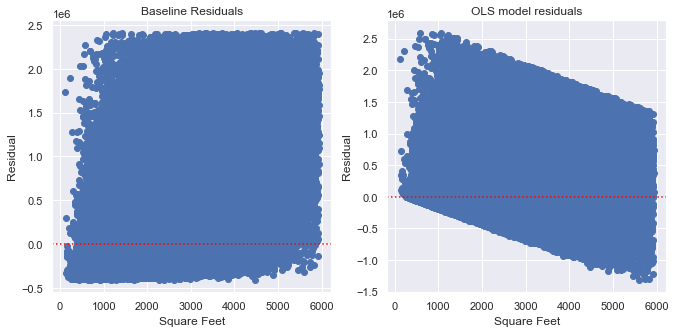

In [26]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.sqft, df.baseline_residual)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.sqft, df.residual)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals');

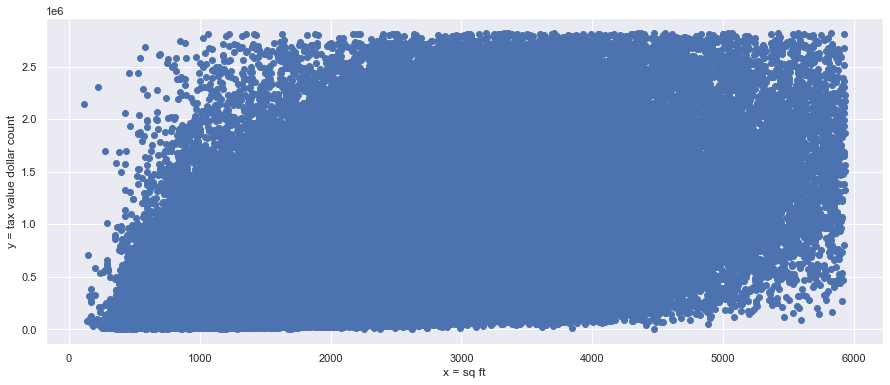

In [11]:
y = pd.DataFrame(df.taxvaluedollarcnt)
X = pd.DataFrame(df.sqft)
# look at scatter of x vs y
plt.scatter(X, y)
plt.xlabel('x = sq ft')
plt.ylabel('y = tax value dollar count');

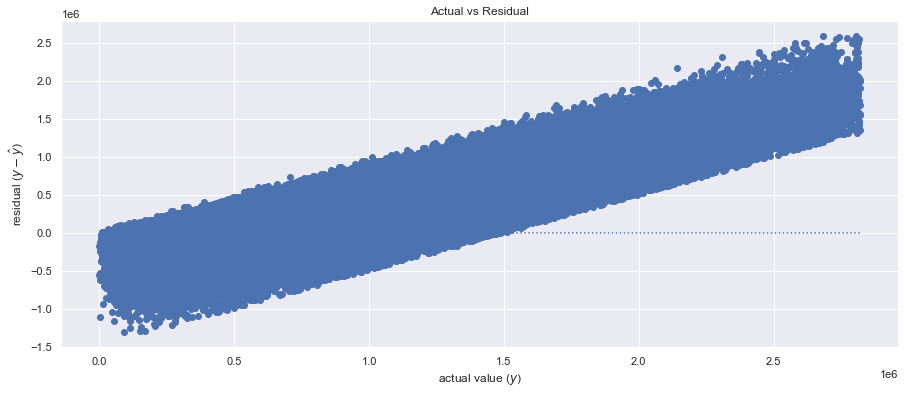

In [30]:
# Residual plot (y vs residual)
actual = df.taxvaluedollarcnt
predicted = df.yhat
residuals = actual - predicted
plt.hlines(0, actual.min(), actual.max(), ls=':')
plt.scatter(actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')
plt.show()


### 4) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.


In [12]:
# sum of residual is zero
df.residual.sum()

-3.6094337701797485e-05

In [13]:
# sum of baseline residual is zero too
df.baseline_residual.sum()

709331.0

In [14]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,sqft,taxvaluedollarcnt,yhat,baseline,residual,baseline_residual,residual^2,baseline_residual^2
1349905,2449.0,432773.0,5.803575e+05,409556,-147584.542347,23217.0,2.178120e+10,5.390291e+08
258766,1599.0,211452.0,3.571102e+05,409556,-145658.156325,-198104.0,2.121630e+10,3.924519e+10
1244806,1969.0,380466.0,4.542884e+05,409556,-73822.430240,-29090.0,5.449751e+09,8.462281e+08
667578,2085.0,202010.0,4.847551e+05,409556,-282745.132333,-207546.0,7.994481e+10,4.307534e+10
882530,4922.0,1107030.0,1.229876e+06,409556,-122846.113680,697474.0,1.509117e+10,4.864700e+11


### calculating sse 

In [15]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 93425651740240464.0
SSE Baseline = 141564208612476192.0


***

### 5) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [16]:
len(df)
df.shape[0]

1174236

### calculating mse

In [17]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  79562925800.5
MSE baseline =  120558566261.4


In [18]:
### calculating RMSE

In [19]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  282069.0
RMSE baseline =  347215.4


### 6) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [20]:
if SSE < SSE_baseline:
    print('OLS regression model performs better than the baseline')
else:
    print('OLS regression model performs worse than the baseline')

OLS regression model performs better than the baseline


### 7) What is the amount of variance explained in your model?

In [21]:
# calculate R2 the easy way:
from sklearn.metrics import r2_score
r2_score(df.taxvaluedollarcnt, df.yhat)

0.340047511611706

### 8) Is your model better than the baseline model?

In [22]:
import statsmodels.api as sm

In [23]:
X2 = sm.add_constant(df.sqft)
est = sm.OLS(df.taxvaluedollarcnt, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 6.050e+05
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:02:41   Log-Likelihood:            -1.6403e+07
No. Observations:             1174236   AIC:                         3.281e+07
Df Residuals:                 1174234   BIC:                         3.281e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.286e+04    660.772    -95.127      0.0

# takeaways
- OLS Regression Model outperformed baseline model on test using RMSE as evaluation metric.

- OLS Regression Model RMSE: 282069.0

- Baseline Regression Model: 347215.4

### 9) Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

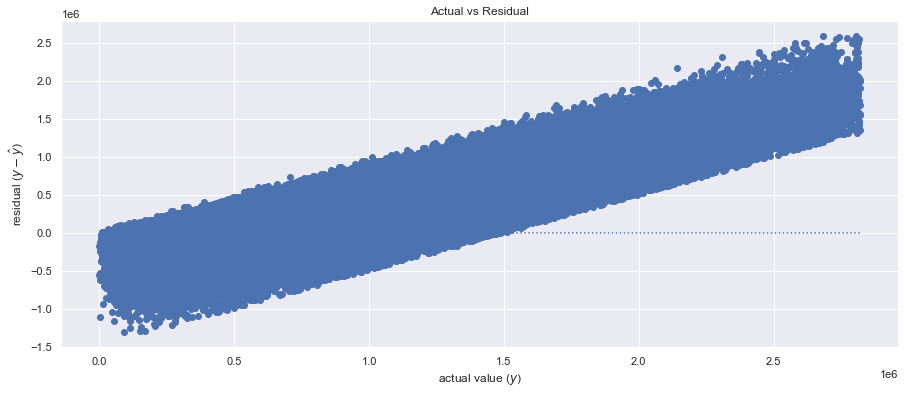

In [44]:
import evaluate

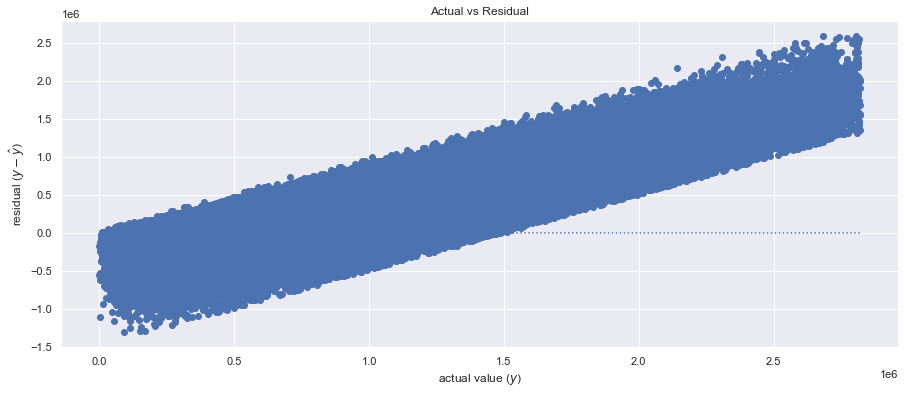

In [45]:
# def plot_residuals(actual, predicted):
#     residuals = actual - predicted
#     plt.hlines(0, actual.min(), actual.max(), ls=':')
#     plt.scatter(actual, residuals)
#     plt.ylabel('residual ($y - \hat{y}$)')
#     plt.xlabel('actual value ($y$)')
#     plt.title('Actual vs Residual')
#     plt.show()

plot_residuals(actual, predicted)

In [34]:
# regression_errors(y, yhat): returns the following values:
# returns residuals
def residuals(actual, predicted):
    return actual - predicted

#sum of squared errors (SSE)
def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

#explained sum of squares (ESS)
def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

#total sum of squares (TSS)
def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

#mean squared error (MSE)
def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

#root mean squared error (RMSE)
def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

# returns r2 score
def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)
#_____________________________________________________________________________________
def regression_errors(actual, predicted):
    return pd.Series({
        'SSE': sse(actual, predicted),
        'ESS': ess(actual, predicted),
        'TSS': tss(actual),
        'MSE': mse(actual, predicted),
        'RMSE': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'SSE': sse(actual, predicted),
        'MSE': mse(actual, predicted),
        'RMSE': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline